
Summary Statistics for ADANIPORTS.csv:
             Close        Volume         VWAP
count  3322.000000  3.322000e+03  3322.000000
mean    344.201626  2.954564e+06   344.853182
std     193.045886  4.104227e+06   193.841305
min     108.000000  1.236600e+04   108.340000
25%     164.312500  7.493682e+05   164.855000
50%     324.700000  2.007292e+06   325.765000
75%     400.912500  3.636883e+06   400.607500
max    1307.450000  9.771788e+07  1302.150000


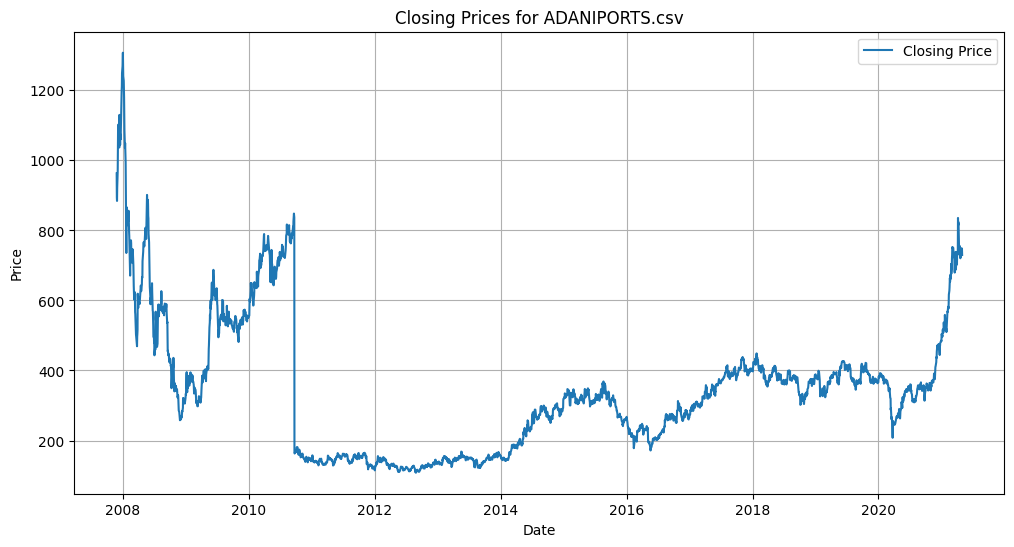

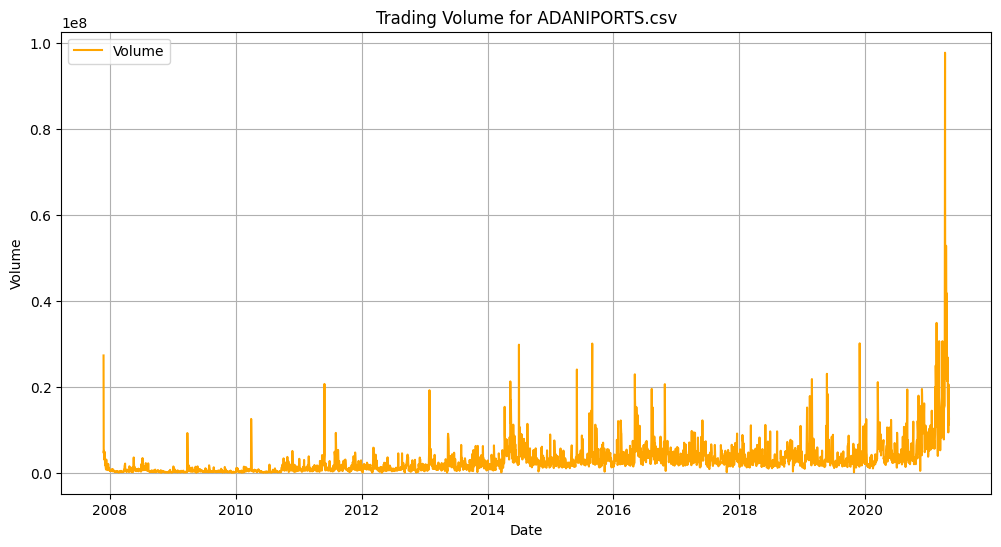

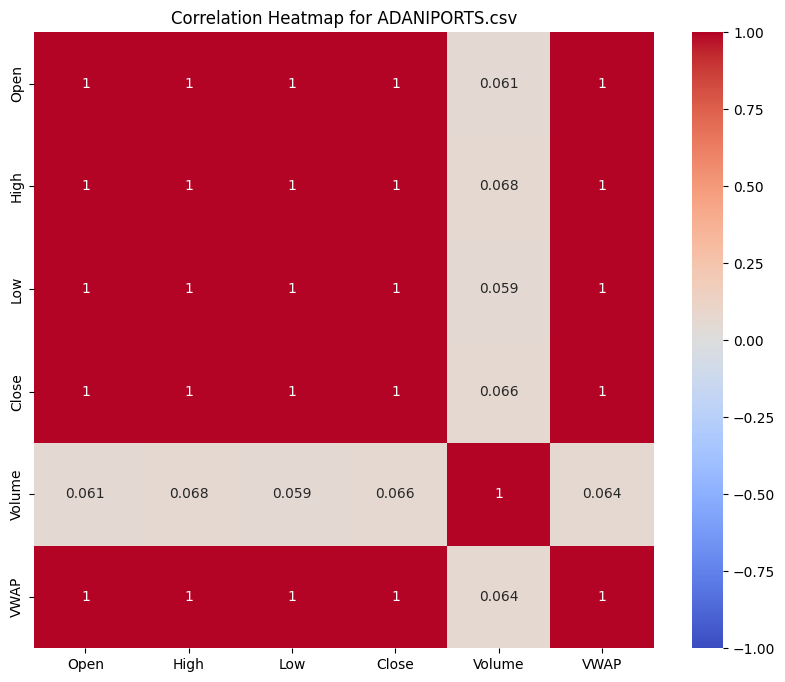

In [1]:
# src/eda.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load data for a specific stock
def load_stock_data(stock_file, data_dir="../data/"):
    file_path = os.path.join(data_dir, stock_file)
    if not os.path.exists(file_path):
        print(f"Error: {file_path} not found.")
        return None
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    return df

# Basic EDA
def perform_eda(stock_file):
    df = load_stock_data(stock_file)
    if df is None:
        return

    # Set date as index
    df.set_index('Date', inplace=True)

    # Summary statistics
    print(f"\nSummary Statistics for {stock_file}:")
    print(df[['Close', 'Volume', 'VWAP']].describe())

    # Plot closing prices
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Closing Price')
    plt.title(f'Closing Prices for {stock_file}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot trading volume
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Volume'], label='Volume', color='orange')
    plt.title(f'Trading Volume for {stock_file}')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid()
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    corr = df[['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Heatmap for {stock_file}')
    plt.show()

# Run EDA for a sample stock
if __name__ == "__main__":
    stock_file = "ADANIPORTS.csv"  # Example stock
    perform_eda(stock_file)